# Defining custom encodings

In this notebook we are going to show how you can define custom operators that can be used with any metaheuristic algorithm.

We will give a number of different ways of doing it, so you can choose which one is more appropiate for you.

In [1]:
import metaheuristic_designer as mhd
from metaheuristic_designer import GeneralAlgorithm, Encoding
from metaheuristic_designer.encodings import LambdaEncoding
from metaheuristic_designer.operators import OperatorReal
from metaheuristic_designer.strategies import HillClimb
from metaheuristic_designer.initializers import UniformVectorInitializer
from metaheuristic_designer.benchmarks import *
from copy import copy
import numpy as np
import random

ImportError: cannot import name 'LambdaEncoding' from 'metaheuristic_designer.encodings' (/home/eugenio/Documentos/Eugenio/metaheuristic-designer/src/metaheuristic_designer/encodings/__init__.py)

## With already defined functions

You can define an encoding by providing both an encoding and decoding functions, the encoding function will transform the representation inside the optimization algorithm (genotype) to the representation used in the objective function (phenotype), the decoding function will perform the inverse transformation.

Here's an example.

In [75]:
def encode_round(vector):
    return np.round(vector).astype(int)


def decode_round(vector):
    return vector.astype(float)

To convert it into an operator, we will pass it to the ```LambdaEncoding``` class to along with its name and other parameters.

In [76]:
round_encoding = LambdaEncoding(encode_round, decode_round)

Now we can directly use it with any algorithm we want, in this case, we will use it in a genetic algorithm.

In [77]:
# Define the parameters of the optimization process
params = {"stop_cond": "time_limit or convergence", "time_limit": 10.0, "patience": 100, "verbose": True, "v_timer": 0.5}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(objfunc.vecsize, objfunc.low_lim * 100, objfunc.up_lim * 100, pop_size=100, encoding=round_encoding)

# Define the operator to be used
mutation = OperatorReal("MutNoise", {"method": "Normal", "F": 1, "N": 1})

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, mutation)

# Define a Search method
search = GeneralAlgorithm(objfunc, algorithm, params)

# Optimize the objective function
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 5317115
	Evaluations of fitness: 100

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.5 s
	CPU time Spent:  0.5 s
	Generation: 259
	Best fitness: 9566
	Evaluations of fitness: 26000

Optimizing Sphere function using HillClimb:
	Real time Spent: 1.0 s
	CPU time Spent:  1.0 s
	Generation: 508
	Best fitness: 2725
	Evaluations of fitness: 50900

Optimizing Sphere function using HillClimb:
	Real time Spent: 1.5 s
	CPU time Spent:  1.5 s
	Generation: 756
	Best fitness: 232
	Evaluations of fitness: 75700



Best solution: [-0.10143305  0.02204575  0.49450797]
Solution fitness: 0

Number of generations: 995
Real time spent: 1.99277s
CPU time spent: 1.99272s
Number of fitness evaluations: 99600
Best fitness: 0


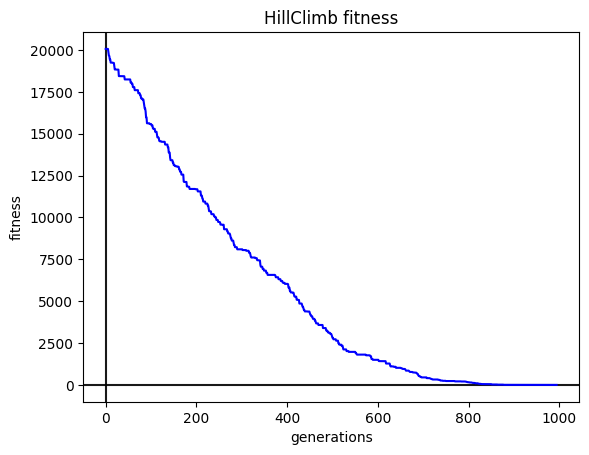

In [78]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()

## With an Encoding class

If we want more control on the encoding, we can make a class that inherits from the base ```Encoding``` class.

To do this, we will implement the ```encode``` and ```decode``` methods.

In [79]:
class RoundEncoding(Encoding):
    def encode(self, phenotype):
        return phenotype.astype(float)

    def decode(self, genotype):
        return np.round(genotype).astype(int)


custom_encoding = RoundEncoding()

We can once again use this encoding as normal.

In [80]:
# Define the parameters of the optimization process
params = {"stop_cond": "time_limit or convergence", "time_limit": 10.0, "patience": 100, "verbose": True, "v_timer": 0.5}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(objfunc.vecsize, objfunc.low_lim * 100, objfunc.up_lim * 100, pop_size=100, encoding=custom_encoding)

# Define the operator to be used
mutation = OperatorReal("MutNoise", {"method": "Normal", "F": 1, "N": 1})

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, mutation)

# Define a Search method
search = GeneralAlgorithm(objfunc, algorithm, params)

# Optimize the objective function
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 13362114
	Evaluations of fitness: 100

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.5 s
	CPU time Spent:  0.5 s
	Generation: 265
	Best fitness: 11665
	Evaluations of fitness: 26600

Optimizing Sphere function using HillClimb:
	Real time Spent: 1.0 s
	CPU time Spent:  1.0 s
	Generation: 540
	Best fitness: 3363
	Evaluations of fitness: 54100

Optimizing Sphere function using HillClimb:
	Real time Spent: 1.5 s
	CPU time Spent:  1.5 s
	Generation: 809
	Best fitness: 16
	Evaluations of fitness: 81000



Best solution: [-0.10828564  0.25732665  0.02291018]
Solution fitness: 0

Number of generations: 935
Real time spent: 1.73156s
CPU time spent: 1.74693s
Number of fitness evaluations: 93600
Best fitness: 0


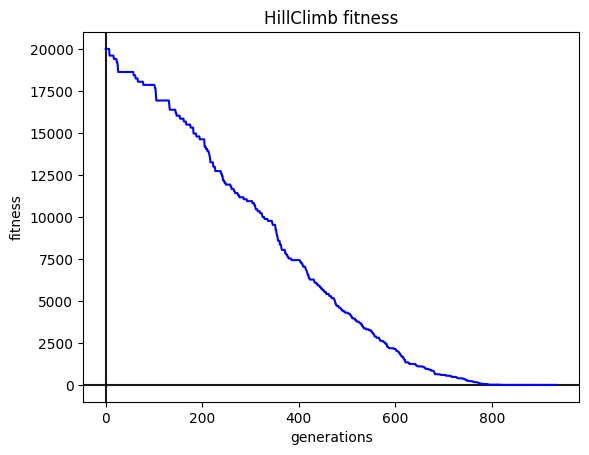

In [81]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()